In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd
from utils.tramdag import *


X, _ = make_blobs(n_samples=100_000,centers=3, n_features=7)
df = pd.DataFrame(X, columns=["x1", "x2", "x3","x4", "x5", "x6", "x7"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/create_configration_test3/configuration.json")
# cfg.plot_dag()

device='cpu'


td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=True,device=device) 





[DEBUG] TramDagModel using device: cpu

[INFO] Building model for node 'x1' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu'}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20

[INFO] Building model for node 'x2' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu'}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20

[INFO] Building model for node 'x3' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu'}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20

[INFO] Building model for node 'x4' with settings: {'set_initial_weights': False, 'debug': True, 'verbose': True, 'device': 'cpu'}
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuou

/home/bule/TramDag/utils/tramdag.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


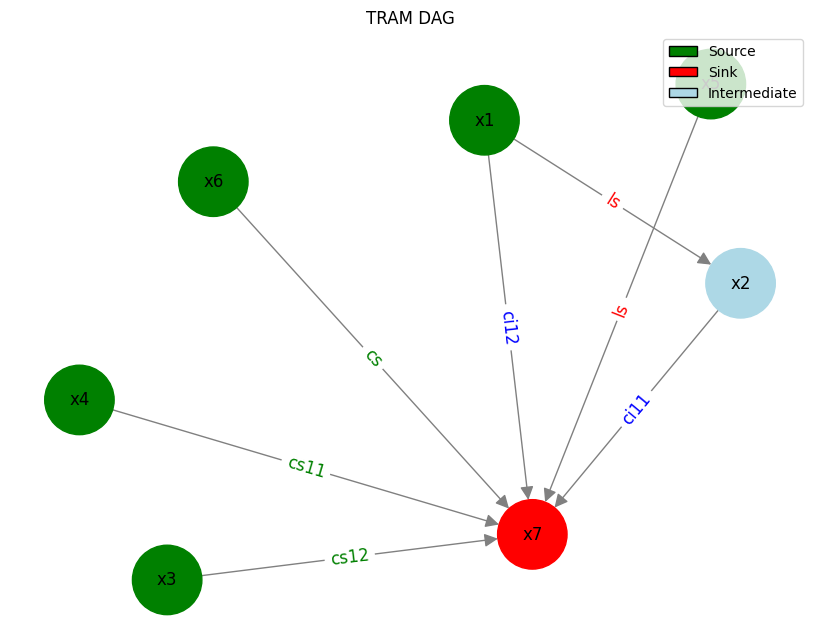

In [6]:
cfg.plot_dag()

In [13]:
td_model.fit(train_df, val_df,epochs=10,batch_size=100_000,prefetch_factor=0,num_workers=None,verbose=True,debug=True,device=device)

[DEBUG] fit(): device: cpu
[INFO] Computing new minmax dict from training data...
[INFO] Saved new minmax dict to /home/bule/TramDag/dev_experiment_logs/create_configration_test3/min_max_scaling.json

[INFO] Training node 'x1' for 10 epochs on cpu
[DEBUG] fitrain_val_loop():  device: cpu
[INFO] Existing model found. Loading weights and history...

===== Epoch 5/10 =====
[TIME] Batch 0 DataLoader fetch: 0.8844s
[TIME] Move to device: 0.0002s
[TIME] Forward: 0.0004s
[TIME] Loss: 0.0268s
[TIME] Backward+Step: 0.0050s
[BATCH 0] Total batch time: 0.0325s

[TIME] Batch 1 DataLoader fetch: 0.8327s
[TIME] Move to device: 0.0000s
[TIME] Forward: 0.0005s
[TIME] Loss: 0.0345s
[TIME] Backward+Step: 0.0049s
[BATCH 1] Total batch time: 0.0400s

[TIME] Batch 2 DataLoader fetch: 0.2330s
[TIME] Move to device: 0.0002s
[TIME] Forward: 0.0003s
[TIME] Loss: 0.0176s
[TIME] Backward+Step: 0.0037s
[BATCH 2] Total batch time: 0.0219s

[VAL] Batch 0 DataLoader fetch: 0.2903s
[VAL] Forward: 0.0003s
[VAL] Loss: 

KeyboardInterrupt: 

In [2]:
td_model.device

device(type='cpu')

In [12]:
td_model.sample(device='cuda')

[DEBUG] sample(): device: cuda
[INFO] Starting full DAG sampling with 10000 samples per node.
[DEBUG] sample_full_dag: device: cuda
[INFO] Deleting all previously sampled data.
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x1/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x2/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x3/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x4/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x5/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x6/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x7/sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x1 fr

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 504.81it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x1'

----*----------*-------------*--------Sample Node: x2 ------------*-----------------*-------------------*--
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x1/sampling
[INFO] Sampling new latents for node x2 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'x2' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x2' not found in DataFrame columns
[DEBUG] Set target_nodes: type=<class 'dict'>, keys=['x1', 'x2', 'x

[DEBUG] sample_continous_modelled_target: node has parents, previously sampled data is loaded for each pa(node)
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:20<00:00, 487.35it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x2'

----*----------*-------------*--------Sample Node: x3 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x3 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'x3' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x3' not found in DataFrame columns
[DEBUG] Set target_nodes: type=<class 'dict'>, keys=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
[DEBUG] Set parents_datatype_dict: type=<class 'collections.OrderedDict'>, keys=[]
[DEBUG] Set transformation_terms_preprocessing: type=<class 'list'>, value=[]
[DEBUG] Set predictors: type=<class 'list'>, value=[]
[DEBUG] Set transform: ty

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 512.24it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x3'

----*----------*-------------*--------Sample Node: x4 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x4 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'x4' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x4' not found in DataFrame columns
[DEBUG] Set target_nodes: type=<class 'dict'>, keys=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
[DEBUG] Set parents_datatype_dict: type=<class 'collections.OrderedDict'>, keys=[]
[DEBUG] Set transformation_terms_preprocessing: type=<class 'list'>, value=[]
[DEBUG] Set predictors: type=<class 'list'>, value=[]
[DEBUG] Set transform: ty

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 509.85it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x4'

----*----------*-------------*--------Sample Node: x5 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x5 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'x5' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x5' not found in DataFrame columns
[DEBUG] Set target_nodes: type=<class 'dict'>, keys=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
[DEBUG] Set parents_datatype_dict: type=<class 'collections.OrderedDict'>, keys=[]
[DEBUG] Set transformation_terms_preprocessing: type=<class 'list'>, value=[]
[DEBUG] Set predictors: type=<class 'list'>, value=[]
[DEBUG] Set transform: ty

[DEBUG] sample_continous_modelled_target: source node, defaults to SI and 1 as inputs
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([10000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([10000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([10000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 513.16it/s]


[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x5'

----*----------*-------------*--------Sample Node: x6 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x6 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cuda
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(10000, 1)
[WARNING] target_col 'x6' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x6' not found in DataFrame columns
[DEBUG] Set target_nodes: type=<class 'dict'>, keys=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
[DEBUG] Set parents_datatype_dict: type=<class 'collections.OrderedDict'>, keys=[]
[DEBUG] Set transformation_terms_preprocessing: type=<class 'list'>, value=[]
[DEBUG] Set predictors: type=<class 'list'>, value=[]
[DEBUG] Set transform: ty

Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 513.35it/s]


[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x6'

----*----------*-------------*--------Sample Node: x7 ------------*-----------------*-------------------*--
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x2/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x2/sampling
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test3/x3/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_e

Chandrupatla root finding: 100%|██████████| 10000/10000 [00:19<00:00, 511.40it/s]


[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([10000])
[INFO] Completed sampling for node 'x7'
[INFO] DAG sampling completed successfully for all nodes.


({'x1': tensor([-37.2255,   1.2801,  -4.0515,  ..., -17.3655, -15.6700, -20.1586]),
  'x2': tensor([ 22.0114, -42.8449, -17.3968,  ...,  -9.0869,  15.0317,   9.7697]),
  'x3': tensor([ -9.5434, -11.2418, -22.4931,  ...,  46.0308, -58.1957, -20.4838]),
  'x4': tensor([ -3.6433, -31.6012,  21.3010,  ...,  -2.4574, -83.1006,  37.1665]),
  'x5': tensor([ -9.2841, -26.1396, -14.0244,  ..., -28.4614, -26.4623, -41.5239]),
  'x6': tensor([-58.7312, -10.9502,  -6.5828,  ..., -12.5580, 146.8409,  -0.2626]),
  'x7': tensor([-11.9401, -10.7098,  -9.8616,  ..., -10.9284,  83.1257,  -8.9169])},
 {'x1': tensor([-1.8487,  0.5299,  0.0822,  ..., -0.7774, -0.6663, -0.9266]),
  'x2': tensor([ 1.9056, -3.6650, -1.4960,  ..., -0.7053,  1.1096,  0.6573]),
  'x3': tensor([-0.3936, -0.4361, -0.6705,  ...,  2.0067, -1.4343, -0.6275]),
  'x4': tensor([-0.1104, -0.8884,  0.6018,  ..., -0.0721, -2.2173,  1.0030]),
  'x5': tensor([-0.4727, -1.5905, -0.7916,  ..., -1.7344, -1.6029, -2.5939]),
  'x6': tensor([-1.85